In [ ]:
Кейс_Анализ A/B тестирвоания внутриигровой акции.

In [ ]:
Цель проекта:

Выяснить, стоит ли проводить акцию в дальнейшем. 
Если игроки, участвовавшие в акции, принесли больше денег, 
чем игроки, у которых акции не было, то стоит повторять акцию и при этом уже на всех игроках.


In [ ]:
Задачи:

Компания, разрабатывающая игры. 
Основной хит – бесплатных командный онлайн-шутер. 
В игре есть внутриигровая валюта, которую можно покупать за реальные деньги. 
На днях в игре прошел A/B-тест – некоторые  - некоторые игроки могли приобрести премиумную броню по скидке. 
Необходимо узнать, как это повлияло на ARPU (средняя прибыль на игрока), 
ARPPU (средняя прибыль на платящего игрока) и траты внутриигровой валюты.

При этом, среди игроков есть читеры — игроки, 
которые с помощью взлома игры начисляют себе большие объёмы внутриигровой валюты. 
У нас есть список уже известных читеров, но есть и ещё не пойманные читеры, 
чьи результаты могут повлиять на выводы. 
Необходимо найти скрытых читеров и продолжить анализ. 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
df_cash = pd.read_csv('Cash.csv')
df_money = pd.read_csv('Money.csv')
df_cheaters = pd.read_csv('Cheaters.csv')
df_ABgroup = pd.read_csv('ABgroup.csv')
df_platforms = pd.read_csv('Platforms.csv')

In [5]:
df_money

,user_id,date,money
0,N4TS2T-P7YTVX,15.07.2021,1.99
1,NX9S0D-VM20W8,16.07.2021,0.99
2,QYY6FW-FKHRND,15.07.2021,0.00
3,BRWH4Y-LPGBU6,14.07.2021,0.00
4,8O317F-4ASK53,13.07.2021,0.00
...,...,...,...
8639995,V2QN9A-KTAB7P,15.07.2021,0.00
8639996,UH5OG7-7KLM76,14.07.2021,0.99
8639997,6O1AE8-8AEE55,17.07.2021,0.99
8639998,33AD2T-TNRERG,12.07.2021,0.99


In [6]:
df_cash

,user_id,date,cash
0,GGLSXL-U5BGGY,17.07.2021,200
1,DPWFFN-NL3VF8,16.07.2021,150
2,PASNNG-GVW4RR,11.07.2021,1100
3,4F0AW7-F40GY9,15.07.2021,1050
4,CEY6AF-YTSM4V,15.07.2021,150
...,...,...,...
8639995,OWJZJH-CNSFHZ,17.07.2021,3150
8639996,A6ZAWD-VD21JU,15.07.2021,200
8639997,L9NUIR-HM22U9,15.07.2021,200
8639998,0A5AY6-NB4ZIS,15.07.2021,200


In [7]:
df_cheaters

,user_id,cheaters
0,TWLWB9-L19SYJ,0
1,SD0L4U-1JG4WN,0
2,QZVG35-P8JKNU,0
3,S2VBV4-ZKBHI6,0
4,DDGKMQ-45SP8R,0
...,...,...
8639995,YEO1HH-AGE5U0,0
8639996,E0ZSN1-XK2WFG,0
8639997,8Q5R71-0BMJDP,0
8639998,KX15V0-ZJSW8T,0


In [8]:
df_ABgroup

,user_id,group
0,VX6NLA-F5YMSW,control
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
4,ND92RZ-SHG980,control
...,...,...
8639995,SCIQGB-VYD7YG,test
8639996,T4PH1E-0FS4DN,test
8639997,YTXXO7-UEM0CT,test
8639998,011P6E-A3WXVH,test


In [10]:
df_platforms

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
2,1UWMRN-8NVCLI,PC
3,EHO5II-03X9PU,PS4
4,7C5ZAE-D1NCY9,XBox
...,...,...
8639995,EYD4LR-O1YYTX,PS4
8639996,J0MR5W-GAGC66,XBox
8639997,Z0EL54-J3BZC4,PS4
8639998,B5FT8W-AR75PV,PC


In [4]:
# 2824 уже обнаруженных читеров
df_cheaters_2824 = df_cheaters[df_cheaters['cheaters'] == 1]
df_cheaters_2824

,user_id,cheaters
65,9WIF40-OW5GLD,1
778,VIHC8Q-YTCOYH,1
4060,1JBTR8-YEDSAI,1
5520,KK8ZQ3-ZZVKN4,1
6631,IC2BED-VNNI2F,1
...,...,...
8630371,5I00P2-5EC43C,1
8630756,BMML50-JSSXDT,1
8634037,NT0YYQ-5WA319,1
8636269,0MMIPN-E23IZG,1


In [ ]:
План действий: 

1. Удаляем известных читеров из таблицы Money
2. Находим скрытых читеров
3. Удаляем скрытых чиетров из таблицы Cash
4. Объединяем "очищенные" данные Money и Cash
5. Группируем данные по id и находим кол-во пользователей, которые не пользовались читами. 

In [5]:
# удаляем уже известных читеров из таблицы Money

df_money_nocheaters = df_money[df_money['user_id'].isin(df_cheaters_2824['user_id']) == False].reset_index(drop=True)
df_money_nocheaters

,user_id,date,money
0,N4TS2T-P7YTVX,15.07.2021,1.99
1,NX9S0D-VM20W8,16.07.2021,0.99
2,QYY6FW-FKHRND,15.07.2021,0.00
3,BRWH4Y-LPGBU6,14.07.2021,0.00
4,8O317F-4ASK53,13.07.2021,0.00
...,...,...,...
8637171,V2QN9A-KTAB7P,15.07.2021,0.00
8637172,UH5OG7-7KLM76,14.07.2021,0.99
8637173,6O1AE8-8AEE55,17.07.2021,0.99
8637174,33AD2T-TNRERG,12.07.2021,0.99


In [6]:
# в df_cash ищем аномальные значения, которые выходят за 3 сигмы. Так мы найдем читеров, которые тратят очень много валюты.
# 22 488 скрытых читеров

def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    level_99 = np.percentile(df[column], 99)
    anomaly = df[(df[column] >= upper_level)^(df[column] >= level_99)]
    return anomaly,upper_level,level_99

In [7]:
anomaly = find_anomaly(df = df_cash, column = 'cash')
len(anomaly[0])/len(df_cash)

0.0026027777777777776

In [8]:
df_anomaly = anomaly[0]
df_anomaly

,user_id,date,cash
363,QLX9DD-VBBJG0,17.07.2021,3200
617,PPL11A-8JFD82,17.07.2021,3400
1557,P33R6O-F2G3WY,17.07.2021,3400
1829,KC25PY-WV4GAP,17.07.2021,3300
1895,6TPGBC-9DJMJ9,17.07.2021,3350
...,...,...,...
8638671,XE0TFQ-IFW0WJ,17.07.2021,3200
8639051,Z87A87-1Y7W1B,17.07.2021,3400
8639153,94VNVM-GQA2LR,17.07.2021,3250
8639856,9XLDCT-AHTJAH,17.07.2021,3300


In [9]:
# удаляем скрытых читеров

df_cash_normal = df_cash[df_cash['user_id'].isin(df_anomaly['user_id']) == False].reset_index(drop=True)
df_cash_normal

,user_id,date,cash
0,GGLSXL-U5BGGY,17.07.2021,200
1,DPWFFN-NL3VF8,16.07.2021,150
2,PASNNG-GVW4RR,11.07.2021,1100
3,4F0AW7-F40GY9,15.07.2021,1050
4,CEY6AF-YTSM4V,15.07.2021,150
...,...,...,...
8460091,R799ZE-9FIG3P,16.07.2021,0
8460092,A6ZAWD-VD21JU,15.07.2021,200
8460093,L9NUIR-HM22U9,15.07.2021,200
8460094,0A5AY6-NB4ZIS,15.07.2021,200


In [10]:
# объединяем два "очищенных" датафрейма.
# данные df_money_nocheaters (реальные деньги без известных читеров) 
# и df_cash_normal (валюта без скрытых читеров)

df_clean = df_money_nocheaters.merge(df_cash_normal, how='inner', on='user_id')
df_clean

,user_id,date_x,money,date_y,cash
0,N4TS2T-P7YTVX,15.07.2021,1.99,13.07.2021,150
1,N4TS2T-P7YTVX,15.07.2021,1.99,14.07.2021,1100
2,N4TS2T-P7YTVX,15.07.2021,1.99,10.07.2021,800
3,N4TS2T-P7YTVX,15.07.2021,1.99,12.07.2021,1550
4,N4TS2T-P7YTVX,15.07.2021,1.99,16.07.2021,400
...,...,...,...,...,...
67659067,2NLQHQ-BSFSL5,15.07.2021,0.00,10.07.2021,300
67659068,2NLQHQ-BSFSL5,15.07.2021,0.00,11.07.2021,1200
67659069,2NLQHQ-BSFSL5,15.07.2021,0.00,12.07.2021,100
67659070,2NLQHQ-BSFSL5,15.07.2021,0.00,15.07.2021,850


In [11]:
# группируем данные по id
# 1 057 173 пользователей, которые не использовали читы

df_no_cheaters = df_clean.groupby('user_id').agg(sum)
df_no_cheaters

,money,cash
user_id,,
00036L-1T885I,31.76,60800
0004MK-MRBUKF,47.60,49200
0004MK-VW0O9L,39.68,50400
0005S4-UEC6BE,47.60,40000
0007I5-EWUD6O,55.52,50800
...,...,...
ZZZPEX-P2T8BH,55.60,52800
ZZZTEN-0QGZ3X,47.76,36800
ZZZTR5-QSI6D3,7.92,47200


In [ ]:
АНАЛИЗ ПЛАТФОРМ

In [ ]:
ПЛАТФОРМА PC

In [69]:
# открываем папку с данными по платформам

df_platforms = pd.read_csv('Platforms.csv').drop_duplicates()
df_platforms

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
2,1UWMRN-8NVCLI,PC
3,EHO5II-03X9PU,PS4
4,7C5ZAE-D1NCY9,XBox
...,...,...
6945909,16WSYQ-3HAAMX,XBox
7018381,24TKVV-NU27F4,XBox
7066183,NQ6KMF-17NVXH,XBox
7118985,FJ3O9O-BHSV3M,PS4


In [70]:
# выбираем платформу PC
# 360 249 участников использовали платформу PC

df_PC = df_platforms[df_platforms['platform'] == 'PC']
df_PC 

,user_id,platform
2,1UWMRN-8NVCLI,PC
6,QY72E9-WIG65T,PC
8,K1NGEU-203Y4H,PC
11,3JRLKN-99RSU5,PC
16,7PJ6SJ-0LT4XB,PC
...,...,...
6689958,PC9KHF-C61KW1,PC
6698949,SLS6Q6-F3AUKD,PC
6706781,USQF0D-YPPPD4,PC
6760354,9XSCYJ-13BSBV,PC


In [71]:
# соединяем данные по платформе PC иданные пользователей, которые не использовали читы

df_PC_nocheaters = df_PC[df_PC['user_id'].isin(df_no_cheaters) == False]
df_PC_nocheaters

,user_id,platform
2,1UWMRN-8NVCLI,PC
6,QY72E9-WIG65T,PC
8,K1NGEU-203Y4H,PC
11,3JRLKN-99RSU5,PC
16,7PJ6SJ-0LT4XB,PC
...,...,...
6689958,PC9KHF-C61KW1,PC
6698949,SLS6Q6-F3AUKD,PC
6706781,USQF0D-YPPPD4,PC
6760354,9XSCYJ-13BSBV,PC


In [72]:
# соединяем данные по пользователям платформы PC и данные по донатам

df_PC_money = pd.merge(df_PC_nocheaters, df_money, how = 'inner', on = 'user_id')
df_PC_money

,user_id,platform,date,money
0,1UWMRN-8NVCLI,PC,15.07.2021,1.99
1,1UWMRN-8NVCLI,PC,16.07.2021,0.00
2,1UWMRN-8NVCLI,PC,17.07.2021,0.00
3,1UWMRN-8NVCLI,PC,12.07.2021,0.00
4,1UWMRN-8NVCLI,PC,11.07.2021,1.99
...,...,...,...,...
2881987,7DBB9B-WX17LF,PC,16.07.2021,0.99
2881988,7DBB9B-WX17LF,PC,17.07.2021,1.99
2881989,7DBB9B-WX17LF,PC,15.07.2021,0.99
2881990,7DBB9B-WX17LF,PC,14.07.2021,0.00


In [73]:
# загружаем файл с данными по группам

df_ab = pd.read_csv('ABgroup.csv').drop_duplicates()
df_ab

,user_id,group
0,VX6NLA-F5YMSW,control
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
4,ND92RZ-SHG980,control
...,...,...
6822417,YO85DZ-Q7ZCCH,test
6884968,469VU0-FGEM54,control
6990980,LEMRDN-H2DPVV,control
7024558,TP68ZQ-3PGM15,control


In [74]:
# соединяем данные по пользователем PC (с донатами) и данные по группам

df_PC_ab = pd.merge(df_PC_money, df_ab, how = 'inner', on = 'user_id')
df_PC_ab

,user_id,platform,date,money,group
0,1UWMRN-8NVCLI,PC,15.07.2021,1.99,test
1,1UWMRN-8NVCLI,PC,16.07.2021,0.00,test
2,1UWMRN-8NVCLI,PC,17.07.2021,0.00,test
3,1UWMRN-8NVCLI,PC,12.07.2021,0.00,test
4,1UWMRN-8NVCLI,PC,11.07.2021,1.99,test
...,...,...,...,...,...
2881987,7DBB9B-WX17LF,PC,16.07.2021,0.99,control
2881988,7DBB9B-WX17LF,PC,17.07.2021,1.99,control
2881989,7DBB9B-WX17LF,PC,15.07.2021,0.99,control
2881990,7DBB9B-WX17LF,PC,14.07.2021,0.00,control


In [75]:
# Пользователи группы test
# 539 653 пользователей 

test = df_ab[df_ab['group'] == 'test']
test

,user_id,group
1,2AXN3D-71ZN86,test
2,K78V3J-TQMV6F,test
3,Z2KEIG-LY3V4H,test
6,L48T70-W483B3,test
8,X2N7P6-8AM85H,test
...,...,...
6482233,XMJOV6-TNQWD0,test
6497271,SAS99T-1CEMH0,test
6542234,NPQQJP-4YTHSY,test
6599395,K4AHMQ-NPE5V3,test


In [ ]:
# Пользователи группы control
# 540 347 пользователей 
control = df_ab[df_ab['group'] == 'control']
control

In [77]:
# донаты группы test

df_PC_money_test = df_PC_money[df_PC_money['user_id'].isin(test['user_id']) == True]
df_PC_money_test

,user_id,platform,date,money
0,1UWMRN-8NVCLI,PC,15.07.2021,1.99
1,1UWMRN-8NVCLI,PC,16.07.2021,0.00
2,1UWMRN-8NVCLI,PC,17.07.2021,0.00
3,1UWMRN-8NVCLI,PC,12.07.2021,0.00
4,1UWMRN-8NVCLI,PC,11.07.2021,1.99
...,...,...,...,...
2881963,SLS6Q6-F3AUKD,PC,14.07.2021,0.99
2881964,SLS6Q6-F3AUKD,PC,16.07.2021,1.99
2881965,SLS6Q6-F3AUKD,PC,17.07.2021,0.00
2881966,SLS6Q6-F3AUKD,PC,11.07.2021,0.00


In [78]:
# донаты группы control

df_PC_money_control = df_PC_money[df_PC_money['user_id'].isin(control['user_id']) == True]
df_PC_money_control

,user_id,platform,date,money
16,K1NGEU-203Y4H,PC,15.07.2021,0.99
17,K1NGEU-203Y4H,PC,13.07.2021,0.00
18,K1NGEU-203Y4H,PC,16.07.2021,0.99
19,K1NGEU-203Y4H,PC,17.07.2021,1.99
20,K1NGEU-203Y4H,PC,14.07.2021,0.99
...,...,...,...,...
2881987,7DBB9B-WX17LF,PC,16.07.2021,0.99
2881988,7DBB9B-WX17LF,PC,17.07.2021,1.99
2881989,7DBB9B-WX17LF,PC,15.07.2021,0.99
2881990,7DBB9B-WX17LF,PC,14.07.2021,0.00


In [79]:
# ARPU (средняя прибыль на игрока)
# 6.25 - средняя прибыль на игрока группы test

ARPU_PC_test = sum(df_PC_money_test['money'])/len(set(df_PC_money_test['user_id']))
ARPU_PC_test

6.257180410816568

In [80]:
# ARPU (средняя прибыль на игрока)
# 5.63 - средняя прибыль на игрока группы control

ARPU_PC_control = sum(df_PC_money_control['money'])/len(set(df_PC_money_control['user_id']))
ARPU_PC_control

5.635039869362261

In [81]:
# Находим доверительный интервал с точностью 95%. Группа test.
# Доверительный интервал от 4.2 до 8.2. То есть средняя прибыль на игрока тестовой группы 
# не выйдет за пределы этого интервала

def my_norm_confidence(df=ARPU_PC_test, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPU_PC_test)
    return interval

confidence_pc_t = my_norm_confidence()
print(confidence_pc_t) 

(4.297216426276514, 8.217144395356623)


In [82]:
# Находим доверительный интервал с точностью 95%. Группа control.
# Доверительный интервал от 4.29 до 8.21. То есть средняя прибыль на игрока контольной группы 
# не выйдет за пределы этого интервала

def my_norm_confidence(df=ARPU_PC_control, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPU_PC_test)
    return interval

confidence_pc_c = my_norm_confidence()
print(confidence_pc_c) 

(4.297216426276514, 8.217144395356623)


<Figure size 640x480 with 0 Axes>

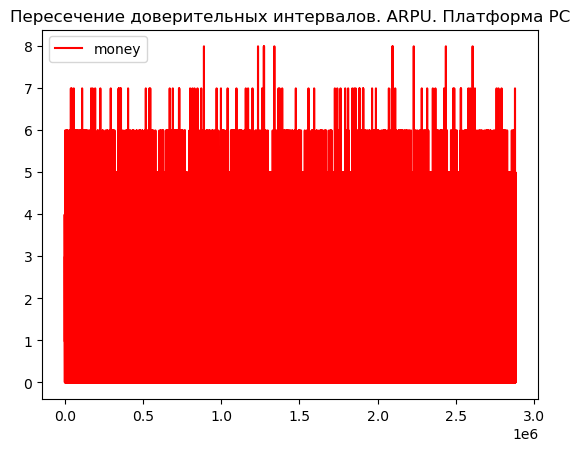

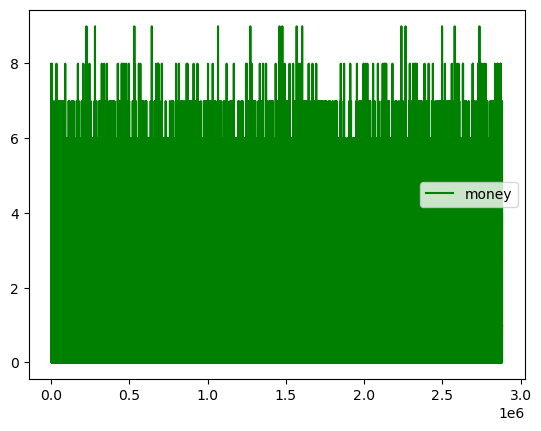

In [124]:
plt.figure();

with pd.plotting.plot_params.use("x_compat", True):
    df_PC_money_control.plot(color="r")
    plt.title("Пересечение доверительных интервалов. ARPU. Платформа PC")
    df_PC_money_test.plot(color="g")

In [ ]:
Доверительные интервалы тестовой и контрольной группы ARPU пересекаются.

In [85]:
# ARPPU  (средняя прибыль на платящего игрока)

# для этого нужно найти платящих игроков
# 1 056 623 платящих игроков (из 1 057 173). То есть не платят всего 550 пользователей

paying_players = df_no_cheaters[df_no_cheaters['money'] > 0]
paying_players

,money,cash
user_id,,
00036L-1T885I,31.76,60800
0004MK-MRBUKF,47.60,49200
0004MK-VW0O9L,39.68,50400
0005S4-UEC6BE,47.60,40000
0007I5-EWUD6O,55.52,50800
...,...,...
ZZZPEX-P2T8BH,55.60,52800
ZZZTEN-0QGZ3X,47.76,36800
ZZZTR5-QSI6D3,7.92,47200


In [86]:
# соединяем данные по пользователям платформы PC и данные по платящим пользователям

df_PC_paying_players = pd.merge(df_PC_nocheaters, paying_players, how = 'inner', on = 'user_id')
df_PC_paying_players

,user_id,platform,money,cash
0,1UWMRN-8NVCLI,PC,55.60,56000
1,QY72E9-WIG65T,PC,79.44,61600
2,K1NGEU-203Y4H,PC,47.60,45600
3,3JRLKN-99RSU5,PC,63.44,62800
4,7PJ6SJ-0LT4XB,PC,71.52,60000
...,...,...,...,...
352701,PC9KHF-C61KW1,PC,55.44,35600
352702,SLS6Q6-F3AUKD,PC,55.52,66800
352703,USQF0D-YPPPD4,PC,47.68,40800
352704,9XSCYJ-13BSBV,PC,23.76,30000


In [87]:
# донаты группы test по платящим пользователям 

df_PC_paying_players_test = df_PC_paying_players[df_PC_paying_players['user_id'].isin(test['user_id']) == True]
df_PC_paying_players_test

,user_id,platform,money,cash
0,1UWMRN-8NVCLI,PC,55.60,56000
1,QY72E9-WIG65T,PC,79.44,61600
3,3JRLKN-99RSU5,PC,63.44,62800
5,7SK54V-ZFGVNU,PC,23.76,47600
6,N3CVSA-JIMJJ5,PC,47.68,54800
...,...,...,...,...
352693,QU22DV-53FP1Y,PC,55.52,49200
352697,534MLE-YTJGRU,PC,47.68,58400
352700,15C2PZ-Z1DNML,PC,31.68,36800
352701,PC9KHF-C61KW1,PC,55.44,35600


In [88]:
# донаты группы control по платящим пользователям

df_PC_paying_players_control = df_PC_paying_players[df_PC_paying_players['user_id'].isin(control['user_id']) == True]
df_PC_paying_players_control

,user_id,platform,money,cash
2,K1NGEU-203Y4H,PC,47.60,45600
4,7PJ6SJ-0LT4XB,PC,71.52,60000
7,5FGP3T-BIISXT,PC,79.36,52000
8,UAQZDF-FSN8RU,PC,55.76,65600
10,OCLQM0-UYZJF4,PC,55.60,51200
...,...,...,...,...
352698,4UH070-B3IRZ7,PC,55.52,62800
352699,21MZHX-RPY8BH,PC,55.52,57600
352703,USQF0D-YPPPD4,PC,47.68,40800
352704,9XSCYJ-13BSBV,PC,23.76,30000


In [89]:
# ARPPU (средняя прибыль на платящего игрока)
# 49.89 - средняя прибыль на игрока группы test

ARPPU_PC_test = sum(df_PC_paying_players_test['money'])/len(set(df_PC_paying_players_test['user_id']))
ARPPU_PC_test

49.89637627519248

In [90]:
# ARPPU (средняя прибыль на платящего игрока)
# 44.99 - средняя прибыль на игрока группы control

ARPPU_PC_control = sum(df_PC_paying_players_control['money'])/len(set(df_PC_paying_players_control['user_id']))
ARPPU_PC_control

44.998582346527925

In [91]:
# Находим доверительный интервал с точностью 95%. Группа test, платящие пользователи.
# Доверительный интервал от 47.9 до 51.8. То есть средняя прибыль на игрока тестовой группы 
# не выйдет за пределы этого интервала

def my_norm_confidence(df=ARPPU_PC_test, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPPU_PC_test)
    return interval

confidence_pc_paying_t = my_norm_confidence()
print(confidence_pc_paying_t) 

(47.93641229065243, 51.856340259732534)


In [93]:
# Находим доверительный интервал с точностью 95%. Группа control, платящие пользователи.
# Доверительный интервал от 43.03 до 46.9. То есть средняя прибыль на игрока тестовой группы 
# не выйдет за пределы этого интервала

def my_norm_confidence(df=ARPPU_PC_control, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPPU_PC_control)
    return interval

confidence_pc_paying_c = my_norm_confidence()
print(confidence_pc_paying_c) 

(43.03861836198787, 46.95854633106798)


<Figure size 640x480 with 0 Axes>

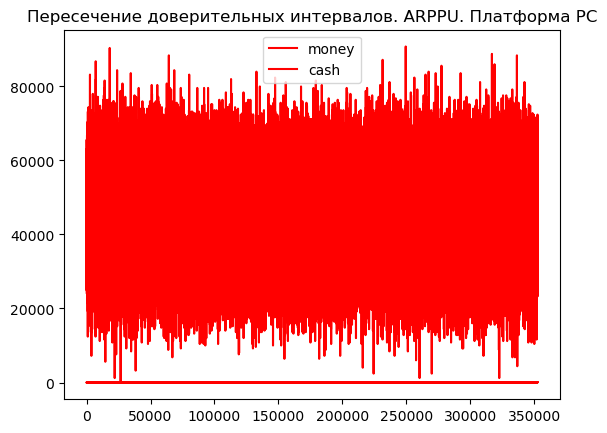

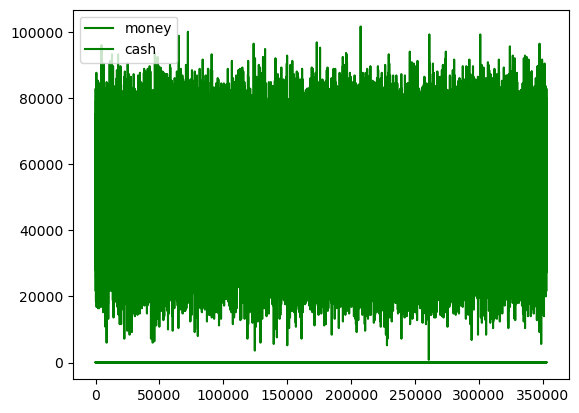

In [126]:
plt.figure();

with pd.plotting.plot_params.use("x_compat", True):
    df_PC_paying_players_control.plot(color="r")
    plt.title("Пересечение доверительных интервалов. ARPPU. Платформа PC")
    df_PC_paying_players_test.plot(color="g")

In [ ]:
Доверительные интервалы тестовой и контрольной группы ARPPU пересекаются.

In [ ]:
Вывод - тестовые и контрольные группы ARPU и ARPPU, соотвественно, пересекаются. 
Это значит, что акция на платфоме PC не прошла успешно.

In [ ]:
ПЛАТФОРМА XBox

In [116]:
# выбираем платформу XBox
# 360 532 участников платформы 2 XBox

df_XBox = df_platforms[df_platforms['platform'] == 'XBox']
df_XBox

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
4,7C5ZAE-D1NCY9,XBox
5,IB88S4-OF6I5X,XBox
10,PZRQ91-FRVQNY,XBox
...,...,...
6584412,X30S2W-RVEIBM,XBox
6861838,EK6UTN-0X5IJ1,XBox
6945909,16WSYQ-3HAAMX,XBox
7018381,24TKVV-NU27F4,XBox


In [96]:
# соединяем данные по платформе XBox и данные пользователей, которые не использовали читы

df_XBox_nocheaters = df_XBox[df_XBox['user_id'].isin(df_no_cheaters) == False]
df_XBox_nocheaters

,user_id,platform
0,NHFL0F-Y90OSH,XBox
1,MVPNHS-PBHB8S,XBox
4,7C5ZAE-D1NCY9,XBox
5,IB88S4-OF6I5X,XBox
10,PZRQ91-FRVQNY,XBox
...,...,...
6584412,X30S2W-RVEIBM,XBox
6861838,EK6UTN-0X5IJ1,XBox
6945909,16WSYQ-3HAAMX,XBox
7018381,24TKVV-NU27F4,XBox


In [97]:
# соединяем данные по пользователям платформы XBox и данные по донатам

df_XBox_money = pd.merge(df_XBox_nocheaters, df_money, how = 'inner', on = 'user_id')
df_XBox_money

,user_id,platform,date,money
0,NHFL0F-Y90OSH,XBox,10.07.2021,0.00
1,NHFL0F-Y90OSH,XBox,15.07.2021,0.99
2,NHFL0F-Y90OSH,XBox,12.07.2021,0.99
3,NHFL0F-Y90OSH,XBox,11.07.2021,0.99
4,NHFL0F-Y90OSH,XBox,13.07.2021,1.99
...,...,...,...,...
2884251,NQ6KMF-17NVXH,XBox,16.07.2021,0.00
2884252,NQ6KMF-17NVXH,XBox,14.07.2021,0.00
2884253,NQ6KMF-17NVXH,XBox,17.07.2021,2.99
2884254,NQ6KMF-17NVXH,XBox,10.07.2021,0.00


In [117]:
# соединяем данные по пользовтаелям XBox (с донатами) и данные по группам

df_XBox_ab = pd.merge(df_XBox_money, df_ab, how = 'inner', on = 'user_id')
df_XBox_ab

,user_id,platform,date,money,group
0,NHFL0F-Y90OSH,XBox,10.07.2021,0.00,test
1,NHFL0F-Y90OSH,XBox,15.07.2021,0.99,test
2,NHFL0F-Y90OSH,XBox,12.07.2021,0.99,test
3,NHFL0F-Y90OSH,XBox,11.07.2021,0.99,test
4,NHFL0F-Y90OSH,XBox,13.07.2021,1.99,test
...,...,...,...,...,...
2884251,NQ6KMF-17NVXH,XBox,16.07.2021,0.00,control
2884252,NQ6KMF-17NVXH,XBox,14.07.2021,0.00,control
2884253,NQ6KMF-17NVXH,XBox,17.07.2021,2.99,control
2884254,NQ6KMF-17NVXH,XBox,10.07.2021,0.00,control


In [99]:
# донаты группы test платформы XBox

df_XBox_money_test = df_XBox_money[df_XBox_money['user_id'].isin(test['user_id']) == True]
df_XBox_money_test

,user_id,platform,date,money
0,NHFL0F-Y90OSH,XBox,10.07.2021,0.00
1,NHFL0F-Y90OSH,XBox,15.07.2021,0.99
2,NHFL0F-Y90OSH,XBox,12.07.2021,0.99
3,NHFL0F-Y90OSH,XBox,11.07.2021,0.99
4,NHFL0F-Y90OSH,XBox,13.07.2021,1.99
...,...,...,...,...
2884243,24TKVV-NU27F4,XBox,16.07.2021,0.99
2884244,24TKVV-NU27F4,XBox,17.07.2021,3.99
2884245,24TKVV-NU27F4,XBox,13.07.2021,0.99
2884246,24TKVV-NU27F4,XBox,11.07.2021,0.99


In [100]:
# донаты группы control платформы XBox

df_XBox_money_control = df_XBox_money[df_XBox_money['user_id'].isin(control['user_id']) == True]
df_XBox_money_control

,user_id,platform,date,money
8,MVPNHS-PBHB8S,XBox,11.07.2021,0.00
9,MVPNHS-PBHB8S,XBox,12.07.2021,0.99
10,MVPNHS-PBHB8S,XBox,16.07.2021,0.99
11,MVPNHS-PBHB8S,XBox,10.07.2021,0.99
12,MVPNHS-PBHB8S,XBox,15.07.2021,1.99
...,...,...,...,...
2884251,NQ6KMF-17NVXH,XBox,16.07.2021,0.00
2884252,NQ6KMF-17NVXH,XBox,14.07.2021,0.00
2884253,NQ6KMF-17NVXH,XBox,17.07.2021,2.99
2884254,NQ6KMF-17NVXH,XBox,10.07.2021,0.00


In [101]:
# ARPU (средняя прибыль на игрока)
# 6.1 - средняя прибыль на игрока группы test

ARPU_XBox_test = sum(df_XBox_money_test['money'])/len(set(df_XBox_money_test['user_id']))
ARPU_XBox_test

6.1327659278713185

In [102]:
# ARPU (средняя прибыль на игрока)
# 6.1 - средняя прибыль на игрока группы control

ARPU_XBox_control = sum(df_XBox_money_control['money'])/len(set(df_XBox_money_control['user_id']))
ARPU_XBox_control

6.103520877743904

In [103]:
# ARPU, XBox, test
# находим доверительный интервал интервал с точностью 95%. Группа test
# доверительный интервал от 4.1 и 8.09. То есть средняя прибыль на игрока тестовой группы
# не выйдет за пределы этого интервала

def my_norm_confidence_XBox_test(df=ARPU_XBox_test, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPU_XBox_test)
    return interval

confidence_XBox_t = my_norm_confidence_XBox_test()
print(confidence_XBox_t)

(4.172801943331264, 8.092729912411372)


In [105]:
# ARPU, XBox, control
# находим доверительный интервал интервал с точностью 95%. Группа control
# доверительный интервал от 4.1 и 8.06. То есть средняя прибыль на игрока тестовой группы
# не выйдет за пределы этого интервала

def my_norm_confidence_XBox_control(df=ARPU_XBox_control, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPU_XBox_control)
    return interval

confidence_XBox_c = my_norm_confidence_XBox_control()
print(confidence_XBox_c)

(4.14355689320385, 8.063484862283957)


<Figure size 640x480 with 0 Axes>

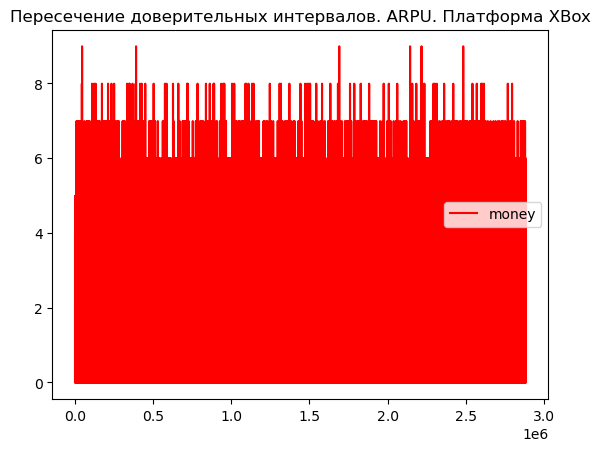

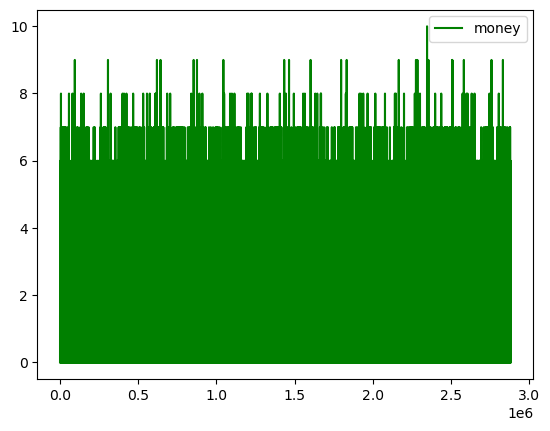

In [129]:
plt.figure();

with pd.plotting.plot_params.use("x_compat", True):
    df_XBox_money_control.plot(color="r")
    plt.title("Пересечение доверительных интервалов. ARPU. Платформа XBox")
    df_XBox_money_test.plot(color="g")

In [ ]:
Доверительные интервалы тестовой и контрольной группы ARPU по платформе XBox пересекаются.

In [107]:
# ARPPU (средняя прибыль на платящего игрока)

# соединяем данные по пользователям платформы XBox

df_XBox_paying_players = pd.merge(df_XBox_nocheaters, paying_players, how = 'inner', on = 'user_id')
df_XBox_paying_players

,user_id,platform,money,cash
0,NHFL0F-Y90OSH,XBox,55.52,44400
1,MVPNHS-PBHB8S,XBox,39.68,47200
2,7C5ZAE-D1NCY9,XBox,47.60,49200
3,IB88S4-OF6I5X,XBox,39.68,45200
4,PZRQ91-FRVQNY,XBox,79.52,56000
...,...,...,...,...
352241,X30S2W-RVEIBM,XBox,79.44,66000
352242,EK6UTN-0X5IJ1,XBox,63.60,59200
352243,16WSYQ-3HAAMX,XBox,47.60,49600
352244,24TKVV-NU27F4,XBox,79.52,71200


In [108]:
# донаты группы test по платящим пользователям

df_XBox_paying_players_test = df_XBox_paying_players[df_XBox_paying_players['user_id'].isin(test['user_id']) == True]
df_XBox_paying_players_test

,user_id,platform,money,cash
0,NHFL0F-Y90OSH,XBox,55.52,44400
4,PZRQ91-FRVQNY,XBox,79.52,56000
5,Q4HIFI-B3ROOF,XBox,47.68,54000
7,1U877I-O387TY,XBox,55.60,55200
10,IQP8T4-1JSHS9,XBox,31.68,37600
...,...,...,...,...
352238,YI4DZS-UMFN01,XBox,55.52,51600
352239,EI8MTP-BPDWYF,XBox,39.68,42400
352241,X30S2W-RVEIBM,XBox,79.44,66000
352243,16WSYQ-3HAAMX,XBox,47.60,49600


In [109]:
# донаты группы control по платящим пользователям

df_XBox_paying_players_control = df_XBox_paying_players[df_XBox_paying_players['user_id'].isin(control['user_id']) == True]
df_XBox_paying_players_control

,user_id,platform,money,cash
1,MVPNHS-PBHB8S,XBox,39.68,47200
2,7C5ZAE-D1NCY9,XBox,47.60,49200
3,IB88S4-OF6I5X,XBox,39.68,45200
6,5ARKCI-8UWN2B,XBox,55.68,58000
8,2FT2J5-81BX96,XBox,31.68,55200
...,...,...,...,...
352233,UZHRRT-2Y3BH4,XBox,63.60,64000
352237,MBBF5G-GRSUOE,XBox,23.84,51600
352240,K2D47F-B5CL3F,XBox,63.52,60800
352242,EK6UTN-0X5IJ1,XBox,63.60,59200


In [110]:
# ARPPU (средняя прибыль на платящего игрока)
# 390.4 - средняя прибыль на игрока группы test

ARPPU_XBox_test = sum(df_XBox_paying_players_test['money'])/len(set(df_XBox_paying_players_test['user_id']))
ARPPU_XBox_test

48.80451949368088

In [111]:
# ARPPU, XBox, test
# находим доверительный интервал интервал с точностью 95%. Группа test
# доверительный интервал от 46.8 и 50.7. То есть средняя прибыль на игрока тестовой группы
# не выйдет за пределы этого интервала

def my_norm_confidence_XBox_test(df=ARPPU_XBox_test, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPPU_XBox_test)
    return interval

confidence_XBox_t = my_norm_confidence_XBox_test()
print(confidence_XBox_t)

(46.844555509140825, 50.76448347822093)


In [114]:
# ARPPU (средняя прибыль на платящего игрока)
# 48.5- средняя прибыль на игрока группы control

ARPPU_XBox_control = sum(df_XBox_paying_players_control['money'])/len(set(df_XBox_paying_players_control['user_id']))
ARPPU_XBox_control

48.57371718772989

In [115]:
# ARPPU, XBox, control
# находим доверительный интервал интервал с точностью 95%. Группа control
# доверительный интервал от 46.6 и 50.3. То есть средняя прибыль на игрока контрольной группы
# не выйдет за пределы этого интервала

def my_norm_confidence_XBox_control(df=ARPPU_XBox_control, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPPU_XBox_control)
    return interval

confidence_XBox_с = my_norm_confidence_XBox_control()
print(confidence_XBox_с)

(46.61375320318984, 50.533681172269944)


<Figure size 640x480 with 0 Axes>

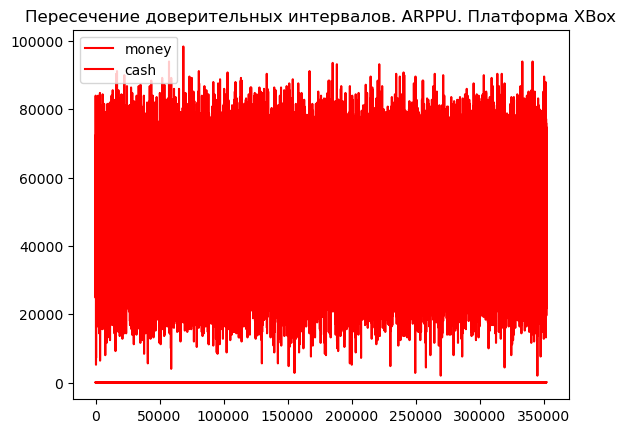

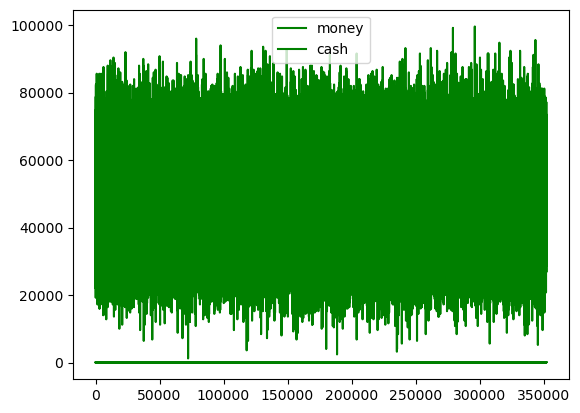

In [131]:
plt.figure();

with pd.plotting.plot_params.use("x_compat", True):
    df_XBox_paying_players_control.plot(color="r")
    plt.title("Пересечение доверительных интервалов. ARPPU. Платформа XBox")
    df_XBox_paying_players_test.plot(color="g")

In [ ]:
Доверительные интервалы тестовой и контрольной группы ARPPU по платформе XBox пересекаются.

In [ ]:
Вывод - тестовые и контрольные группы ARPU и ARPPU, соотвественно, пересекаются. 
Это значит, что акция на платфоме XBox не прошла успешно.

In [ ]:
ПЛАТФОРМА PS4

In [15]:
# выбираем платформу PS4
# 359 219 участников использовали платформу PS4

df_PS4 = df_platforms[df_platforms['platform'] == 'PS4']
df_PS4

,user_id,platform
3,EHO5II-03X9PU,PS4
7,FV7GP9-95XF41,PS4
9,EJ2I93-0QY36N,PS4
12,VHMA1L-C0VIOU,PS4
14,Q0XVFE-XYX7PW,PS4
...,...,...
6571804,QVWJK7-SLZFT4,PS4
6669540,TURMLU-GOCAZI,PS4
6794929,FUBURR-R3W5OK,PS4
7118985,FJ3O9O-BHSV3M,PS4


In [17]:
# соединяем данные по платформе PS4 и данные пользователей, которые не использовали читы

df_PS4_nocheaters = df_PS4[df_PS4['user_id'].isin(df_no_cheaters) == False]
df_PS4_nocheaters

,user_id,platform
3,EHO5II-03X9PU,PS4
7,FV7GP9-95XF41,PS4
9,EJ2I93-0QY36N,PS4
12,VHMA1L-C0VIOU,PS4
14,Q0XVFE-XYX7PW,PS4
...,...,...
6571804,QVWJK7-SLZFT4,PS4
6669540,TURMLU-GOCAZI,PS4
6794929,FUBURR-R3W5OK,PS4
7118985,FJ3O9O-BHSV3M,PS4


In [22]:
# соединяем данные по пользоателям платформы PS4 и данные по донатам

df_PS4_money = pd.merge(df_PS4_nocheaters, df_money, how = 'inner', on = 'user_id')
df_PS4_money 

,user_id,platform,date,money
0,EHO5II-03X9PU,PS4,16.07.2021,0.00
1,EHO5II-03X9PU,PS4,17.07.2021,0.99
2,EHO5II-03X9PU,PS4,13.07.2021,0.99
3,EHO5II-03X9PU,PS4,15.07.2021,0.99
4,EHO5II-03X9PU,PS4,14.07.2021,0.99
...,...,...,...,...
2873747,O96AC0-DWWI69,PS4,17.07.2021,1.99
2873748,O96AC0-DWWI69,PS4,16.07.2021,1.99
2873749,O96AC0-DWWI69,PS4,15.07.2021,0.99
2873750,O96AC0-DWWI69,PS4,11.07.2021,0.00


In [23]:
# соединяем данные по пользователям платформы PS4 (с донатами) и данные по групам

df_PS4_ab = pd.merge(df_PS4_money, df_ab, how = 'inner', on = 'user_id')
df_PS4_ab

,user_id,platform,date,money,group
0,EHO5II-03X9PU,PS4,16.07.2021,0.00,control
1,EHO5II-03X9PU,PS4,17.07.2021,0.99,control
2,EHO5II-03X9PU,PS4,13.07.2021,0.99,control
3,EHO5II-03X9PU,PS4,15.07.2021,0.99,control
4,EHO5II-03X9PU,PS4,14.07.2021,0.99,control
...,...,...,...,...,...
2873747,O96AC0-DWWI69,PS4,17.07.2021,1.99,control
2873748,O96AC0-DWWI69,PS4,16.07.2021,1.99,control
2873749,O96AC0-DWWI69,PS4,15.07.2021,0.99,control
2873750,O96AC0-DWWI69,PS4,11.07.2021,0.00,control


In [28]:
# донаты группы test платформы PS4

df_PS4_money_test = df_PS4_money[df_PS4_money['user_id'].isin(test['user_id']) == True]
df_PS4_money_test

,user_id,platform,date,money
16,EJ2I93-0QY36N,PS4,14.07.2021,1.99
17,EJ2I93-0QY36N,PS4,12.07.2021,0.00
18,EJ2I93-0QY36N,PS4,16.07.2021,0.00
19,EJ2I93-0QY36N,PS4,10.07.2021,0.00
20,EJ2I93-0QY36N,PS4,13.07.2021,0.00
...,...,...,...,...
2873739,FJ3O9O-BHSV3M,PS4,14.07.2021,0.99
2873740,FJ3O9O-BHSV3M,PS4,10.07.2021,0.00
2873741,FJ3O9O-BHSV3M,PS4,11.07.2021,0.99
2873742,FJ3O9O-BHSV3M,PS4,16.07.2021,0.99


In [29]:
# донаты группы control платформы PS4

df_PS4_money_control = df_PS4_money[df_PS4_money['user_id'].isin(control['user_id']) == True]
df_PS4_money_control

,user_id,platform,date,money
0,EHO5II-03X9PU,PS4,16.07.2021,0.00
1,EHO5II-03X9PU,PS4,17.07.2021,0.99
2,EHO5II-03X9PU,PS4,13.07.2021,0.99
3,EHO5II-03X9PU,PS4,15.07.2021,0.99
4,EHO5II-03X9PU,PS4,14.07.2021,0.99
...,...,...,...,...
2873747,O96AC0-DWWI69,PS4,17.07.2021,1.99
2873748,O96AC0-DWWI69,PS4,16.07.2021,1.99
2873749,O96AC0-DWWI69,PS4,15.07.2021,0.99
2873750,O96AC0-DWWI69,PS4,11.07.2021,0.00


In [30]:
# ARPU (средняя прибыль на игрока)
# 6.08 - средняя прибыль на игрока группы test

ARPU_PS4_test = sum(df_PS4_money_test['money'])/len(set(df_PS4_money_test['user_id']))
ARPU_PS4_test

6.084882590604653

In [31]:
# ARPU (средняя прибыль на игрока)
# 5.7 - средняя прибыль на игрока группы control

ARPU_PS4_control = sum(df_PS4_money_control['money'])/len(set(df_PS4_money_control['user_id']))
ARPU_PS4_control

5.7376469377414026

In [32]:
# ARPU, PS4, test
# находим доверительный интервал интервал с точностью 95%. Группа test
# доверительный интервал от 4.1 и 8.0. То есть средняя прибыль на игрока тестовой группы
# не выйдет за пределы этого интервала

def my_norm_confidence_PS4_test(df=ARPU_PS4_test, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPU_PS4_test)
    return interval

confidence_PS4_t = my_norm_confidence_PS4_test()
print(confidence_PS4_t)

(4.124918606064599, 8.044846575144707)


In [36]:
# ARPU, PS4, control
# находим доверительный интервал интервал с точностью 95%. Группа control
# доверительный интервал от 3.7 и 7.6. То есть средняя прибыль на игрока тестовой группы
# не выйдет за пределы этого интервала

def my_norm_confidence_PS4_control(df=ARPU_PS4_control, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPU_PS4_control)
    return interval

confidence_PS4_c = my_norm_confidence_PS4_control()
print(confidence_PS4_c)

(3.7776829532013485, 7.697610922281457)


<Figure size 640x480 with 0 Axes>

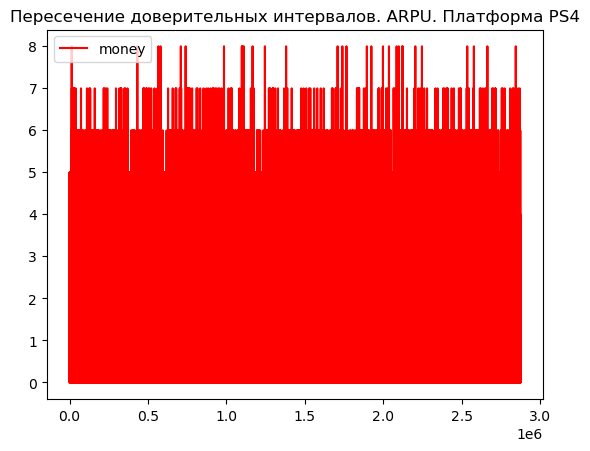

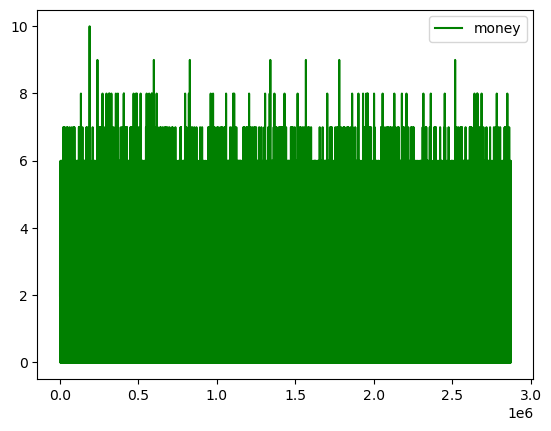

In [132]:
plt.figure();

with pd.plotting.plot_params.use("x_compat", True):
    df_PS4_money_control.plot(color="r")
    plt.title("Пересечение доверительных интервалов. ARPU. Платформа PS4")
    df_PS4_money_test.plot(color="g")

In [ ]:
Доверительные интервалы тестовой и контрольной группы ARPU по платформе XBox пересекаются.

In [40]:
# ARPPU (средняя прибыль на платящего игрока)

# соединяем данные по пользователям платформы PS4

df_PS4_paying_players = pd.merge(df_PS4_nocheaters, paying_players, how = 'inner', on = 'user_id')
df_PS4_paying_players

,user_id,platform,money,cash
0,EHO5II-03X9PU,PS4,39.60,50800
1,FV7GP9-95XF41,PS4,87.52,69200
2,EJ2I93-0QY36N,PS4,23.84,40400
3,VHMA1L-C0VIOU,PS4,55.52,46000
4,Q0XVFE-XYX7PW,PS4,47.68,48000
...,...,...,...,...
351666,QVWJK7-SLZFT4,PS4,55.60,46400
351667,TURMLU-GOCAZI,PS4,39.60,50800
351668,FUBURR-R3W5OK,PS4,79.44,60800
351669,FJ3O9O-BHSV3M,PS4,47.52,32400


In [41]:
# донаты группы test по платящим пользователям

df_PS4_paying_players_test = df_PS4_paying_players[df_PS4_paying_players['user_id'].isin(test['user_id']) == True]
df_PS4_paying_players_test

,user_id,platform,money,cash
2,EJ2I93-0QY36N,PS4,23.84,40400
4,Q0XVFE-XYX7PW,PS4,47.68,48000
7,OTA944-AW1BI5,PS4,63.60,52800
10,KRMFY8-FFMVPD,PS4,55.52,56000
11,0B91MS-7SYLJH,PS4,39.68,38400
...,...,...,...,...
351663,28ZXE1-8UJ4EV,PS4,23.76,50400
351666,QVWJK7-SLZFT4,PS4,55.60,46400
351667,TURMLU-GOCAZI,PS4,39.60,50800
351668,FUBURR-R3W5OK,PS4,79.44,60800


In [42]:
# донаты группы control по платящим пользователям

df_PS4_paying_players_control = df_PS4_paying_players[df_PS4_paying_players['user_id'].isin(control['user_id']) == True]
df_PS4_paying_players_control

,user_id,platform,money,cash
0,EHO5II-03X9PU,PS4,39.60,50800
1,FV7GP9-95XF41,PS4,87.52,69200
3,VHMA1L-C0VIOU,PS4,55.52,46000
5,7LCPU4-2YC7HZ,PS4,39.76,43200
6,DO61R7-A8JOGN,PS4,79.68,57600
...,...,...,...,...
351660,JU71H9-LIKN45,PS4,15.84,34400
351662,14UIWJ-642Y01,PS4,23.84,34000
351664,UY2F2Y-V6S5P7,PS4,71.52,51600
351665,VE822T-XF4JCP,PS4,47.60,47600


In [43]:
# ARPPU (средняя прибыль на платящего игрока)
# 48.4 - средняя прибыль на игрока группы test

ARPPU_PS4_test = sum(df_PS4_paying_players_test['money'])/len(set(df_PS4_paying_players_test['user_id']))
ARPPU_PS4_test

48.43889000397425

In [44]:
# ARPPU, PS4, test
# находим доверительный интервал интервал с точностью 95%. Группа test
# доверительный интервал от 46.4 и 50.3. То есть средняя прибыль на игрока тестовой группы
# не выйдет за пределы этого интервала

def my_norm_confidence_PS4_test(df=ARPPU_PS4_test, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPPU_PS4_test)
    return interval

confidence_PS4_t = my_norm_confidence_PS4_test()
print(confidence_PS4_t)

(46.4789260194342, 50.398853988514304)


In [46]:
# ARPPU (средняя прибыль на платящего игрока)
# 45.6 - средняя прибыль на игрока группы control

ARPPU_PS4_control = sum(df_PS4_paying_players_control['money'])/len(set(df_PS4_paying_players_control['user_id']))
ARPPU_PS4_control

45.68487570810783

In [47]:
# ARPPU, PS4, control
# находим доверительный интервал интервал с точностью 95%. Группа control
# доверительный интервал от 43.7 и 47.6. То есть средняя прибыль на игрока контрольной группы
# не выйдет за пределы этого интервала

def my_norm_confidence_PS4_control(df=ARPPU_PS4_control, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=ARPPU_PS4_control)
    return interval

confidence_PS4_с = my_norm_confidence_PS4_control()
print(confidence_PS4_с)

(43.72491172356778, 47.644839692647885)


<Figure size 640x480 with 0 Axes>

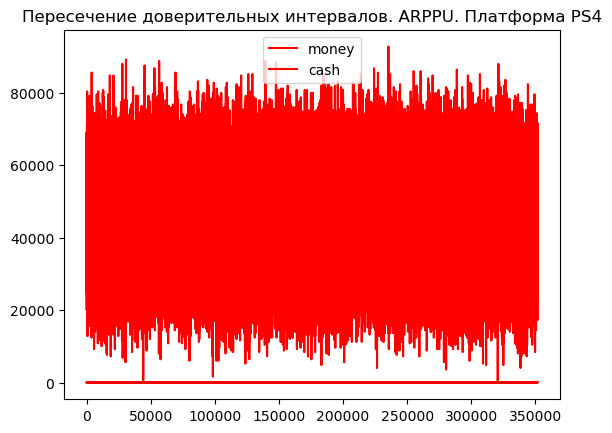

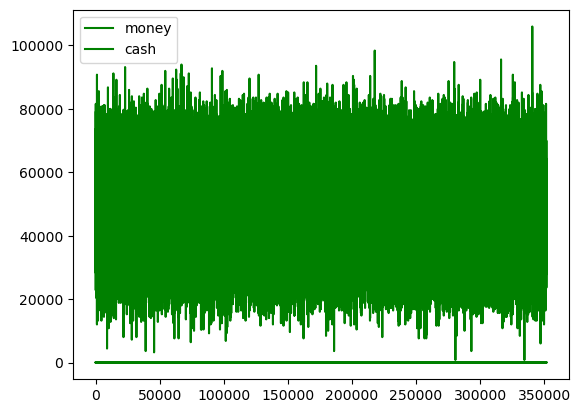

In [133]:
plt.figure();

with pd.plotting.plot_params.use("x_compat", True):
    df_PS4_paying_players_control.plot(color="r")
    plt.title("Пересечение доверительных интервалов. ARPPU. Платформа PS4")
    df_PS4_paying_players_test.plot(color="g")

In [ ]:
Доверительные интервалы тестовой и контрольной группы ARPPU по платформе PS4 пересекаются.

In [ ]:
Вывод - тестовые и контрольные группы ARPU и ARPPU, соотвественно, пересекаются. 
Это значит, что акция на платфоме XBox не прошла успешно.